# ДЗ 4. Множественная проверка гипотез. Бутстреп. АБ-тестирование

# Задача 1. (теория, 25 баллов)

Ответьте на следующие вопросы своими словами, сопровождая ответ примерами (примеры нужно брать не из лекции, а из собственного опыта/придумав). Половина баллов ставится за теоретический ответ, половина - за корректно приведённый пример.

* **(5 баллов)** Что такое ошибки первого и второго рода? Что такое уровень значимости теста и его мощность?

Ошибка первого рода - это вероятность отвергнуть гипотезу, когда она верна.
Ошибка второго рода - это вероятность не отвергнуть гипотезу, когда она не верна


 Поставьте задачу проверки гипотезы (сформулируйте не только саму гипотезу, но и альтернативу). На данном примере поясните, что такое ошибка первого рода, ошибка второго рода (см. начало лекции 8 как пример).

Сформулируем гипотезу: Школьники из регионов сдают ЕГЭ в среднем так же как и школьники из Москвы:
Н(0): Среднее первой и второй совокупности равны
H(A): Среднее совокупности московских школьников выше, чем среднее для регионов
В этом случае ошибкой первого рода будет сказать, что среднее не равно, когда в совокупности оно одинаково, а ошибкой второго рода будет утверждать, что среднее равно, когда в реальности это будет не так


* **(10 баллов)** Зачем нужна множественная проверка гипотез? Что такое FWER? Почему мощность метода Бонферрони меньше, чем мощность метода Холма? Приведите пример ситуации, когда применение методов множественной проверки гипотез может быть необходимо.

Множественная проверка гипотез - это процесс проверки n гипотез одновременно. В случае, когда мы проверяем несколько гипотез одновременно вероятность ошибки первого рода растет экспоненциально, поэтому для проверки нескольких гипотез нам нужно использовать определенные стратегии ,которые могут помочь контролировать рост ошибки первого рода.

FWER - вероятность совершить хотя бы одну ошибку первого рода при тестировании гипотез.

Метод Холма - это поправка к методу Бонферрони, который слишком сильно снижает порог ошибки первого рода, что приводит к росту ошибки второго рода. Мощность теста у нас вычисляется как из единицы  вычесть вероятность ошибки второго рода, а значит тест, с слишкой большой ошибкой второго рода, будет имень маленькую мощность. В методе Холла у нас более мягкое отношение к ошибке первого рода, так как вместо того, чтобы устанавливать порог ошибка на урове а/к, мы пользуемся схемой а/к, а/(к-1)....

Примером множественного тестирование гипотез может служить испытание различных модификаций уже существующего препарата, являются ли они более эффективными или нет. В таком случае нам нужно будет сравнивать каждую модификацию с существующим препаратом.



* **(10 баллов)**  Для чего нужен бутстреп? Какой должна быть выборка, чтобы бутстреп был успешен? Чем отличается доверительный интервал Холла от доверительного интервала Эфрона? Приведите пример небольшой выборки и 3 бутстреповских выборок из неё. Посчитайте с их помощью дисперсию первого выборочного квартиля (25% перцентиля).

Бутстреп нужен нам для нахождении информации о генеральной совокупности путем анализа выборки, когда мы не знаем информации о распределении. Однако бутстреп хорошо работает только с репрезентативной выборкой, если это не так, то эффективность данного метода падает.

Доверительный интервал Холла отличается наличием центрирования статистики тета (тета из бутсреповской выборки - тета из данной выборки), что помогает получать несмещенные результаты.
Приведем пример выборки:
(1, 2, 3) -> бутстреповские выборки (1,1, 2), (2,3,3), (3,3,3)
-> квартили (у нас первым квартилем будет первое значение по формуле k*(n+10)/4) 1,2,3 -> дисперсия (1+0+1)/3 = 2/3

In [14]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

# Задача 2. (75 баллов)

Вы являетесь владельцем сайта, на котором размещаются аккорды и табулатуры для гитары к известным песням. Для того, чтобы извлечь прибыль из помощи начинающим музыкантам, вы размещаете на своём сайте очень релевантную пользователям рекламу. Под неё у вас имеется три выделенных места на странице сайта (то есть одновременно показываются три объявления). Если на объявление кликают, то с рекламодателя списывается определённый платёж. Каждая строчка в логе - это информация об одном заходе на сайт. В соответствующей рекламной позиции колонке пишется платёж рекламодателя, либо 0, если на рекламу пользователь не кликал.

Тут к вам приходит ML-разработчик и говорит, что он обучил модель, улучшающую ранжирование (отбор) рекламы. Вы решаете провести AB-тест. После его проведения у вас в наличии контрольная (до изменения ранжирования) и тестовая (с новой моделью ранжирования) выборки платежей рекламодателей с каждой позиции (то есть всего шесть массивов). Ваш подчинённый стажёр-аналитик уже почистил их от выбросов и загрузил их в numpy массивы.

* **(10 баллов)** Загрузите данные. Визуализируйте их, построив сравнительные гистограммы (то есть на одном графике постройте гистограммы до и после внедрения) для каждой позиции. Какая особенность в данных имеется? Есть ли эффект от внедрения на каждой позиции или нет (визуально)?

In [15]:
data = pd.read_csv("/content/control.csv")
data.head()

,Unnamed: 0,position_1,position_2,position_3
0,0,162.653811,129.137424,156.936867
1,1,141.669563,87.411934,109.776013
2,2,0.000000,101.022540,147.892473
3,3,158.722011,78.210189,97.205361
4,4,0.000000,177.414528,0.000000


In [16]:
data_test = pd.read_csv("/content/test.csv")
data_test.head()

,Unnamed: 0,position_1,position_2,position_3
0,0,0.000000,51.098903,0.000000
1,1,0.000000,101.628224,278.852799
2,2,55.937492,81.885707,115.588688
3,3,46.283994,0.000000,108.444513
4,4,0.000000,0.000000,151.055981


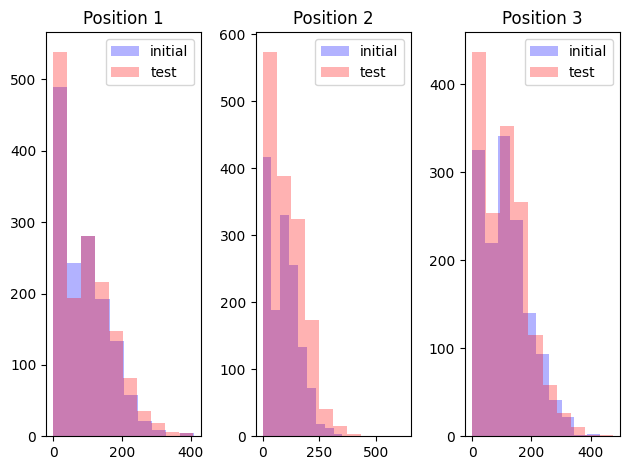

In [17]:
fig, ax = plt.subplots(1, 3)
for i in range(3):
    ax[i].hist(data.iloc[:,i+1], color='blue', alpha=0.3, label='initial')
    ax[i].hist(data_test.iloc[:,i+1], color='red', alpha=0.3, label='test')
    ax[i].legend(loc='upper right')
    ax[i].set_title(f'Position {i+1}')
plt.tight_layout()
plt.show()

* **(15 баллов)** Вы решили посмотреть на среднюю прибыль на каждой позиции в отдельности. Контролируя FWER на уровне 0.05 проверьте гипотезу о том, что внедрение увеличивает среднюю прибыль с позиции?

In [23]:
# Попробуем использовать т-тест для зависимых выборок
import numpy as np
from scipy import stats
rows = min(len(data), len(data_test))
val_list = []
bigger = []
for i in range(3):
  stat , p_val = stats.ttest_rel(data_test.iloc[:rows,i+1], data.iloc[:rows,i+1])
  one_sided = p_val/ 2 if stat > 0 else 1.0
  val_list.append(p_val)
  bigger.append(one_sided)
print(bigger)
print(val_list)



[0.05524919206993822, 0.008340144242944762, 1.0]
[0.11049838413987643, 0.016680288485889525, 0.042684395474779896]


In [24]:
# Теперь мультитестинг
from statsmodels.stats.multitest import multipletests
rejected, p_corrected, _, _ = multipletests(val_list, alpha=0.05, method='holm')
print(rejected) # Так средние отличаются

[False False False]


In [26]:
rejected, p_corrected, _, _ = multipletests(bigger, alpha=0.05, method='holm')
print(rejected) # Как и следовало из графика, среднея прибыль улучшается только для второй позиции

[False  True False]


* **(15 баллов)** Вдруг вы вспомнили курс статистики и то, что от постановки гипотезы очень сильно зависит вывод. Контролируя FWER на уровне 0.05 проверьте, есть ли позиции, где внедрение наоборот, уменьшает прибыль?

In [28]:
# Просто проведем тест обратный предыдущему
smaller = []
for i in range(3):
  stat , p_val = stats.ttest_rel(data_test.iloc[:rows,i+1], data.iloc[:rows,i+1])
  one_sided_2 = p_val/ 2 if stat < 0 else 1.0
  smaller.append(one_sided_2)
print(smaller)


[1.0, 1.0, 0.021342197737389948]


In [29]:
rejected, p_corrected, _, _ = multipletests(smaller, alpha=0.05, method='holm')
print(rejected) # доказательств того, что внедрение уменьшает прибыль не найдено

[False False False]


* **(5 баллов)** Сделайте вывод о том, стоит ли выкатывать в продакшн или нет данную модель.

Данная модель имеет определенную эффективность на 2 позиции и не понижает прибыль на остальных, так что можно выкатывать

* **(25 баллов)** Тут вам показалось, что распределение цен не очень подходит для проверки гипотезы о средних (интересно, почему?) - [среднее не устойчиво к выбросам, прибыль лучше мерить медианой]. Да и прибыль с одной рекламной позиции вас мало интересует, интересует суммарная прибыль.

    Постройте выборку суммарной прибыли с одного захода на сайт (для этого числа в каждой строчке нужно сложить). Постройте бутстреповский доверительный интервал Эфрона и Холла для разности медиан в контроле и тесте уровня доверия 0.95. Сравните их. На основании ДИ ответьте на вопрос: увеличивает ли значимо внедрение суммарную прибыль или нет?

In [31]:
data["Overall"] = data.iloc[:,1:4].sum(axis=1)
data_test["Overall"] = data_test.iloc[:,1:4].sum(axis=1)
data.head()

,Unnamed: 0,position_1,position_2,position_3,Overall
0,0,162.653811,129.137424,156.936867,448.728102
1,1,141.669563,87.411934,109.776013,338.857511
2,2,0.000000,101.022540,147.892473,248.915012
3,3,158.722011,78.210189,97.205361,334.137561
4,4,0.000000,177.414528,0.000000,177.414528


In [39]:
from sklearn.utils import resample
def bootstrap_median(data): # Будет делать выборки и считать медианы
    mlist = []
    for i in range(len(data)):
      array = resample(data, replace=True, random_state = 907)
      mlist.append(np.median(array))
    return mlist



In [43]:
min_len = min(len(bootstrap_prime), len(bootstrap_test))
bootstrap_prime = bootstrap_median(data['Overall'])
bootstrap_test = bootstrap_median(data_test['Overall'])
min_len = min(len(bootstrap_prime), len(bootstrap_test))
difference = np.array(bootstrap_test[min_len]) - np.array(bootstrap_prime[:min_len])

efron = np.percentile(difference, [2.5, 97.5])
print(efron)

[ 3.90032005 20.7622269 ]


In [48]:
#Теперь для интервала Холла
center = np.median(data_test['Overall']) - np.median(data['Overall'])
center_difference = difference - center
two_q = np.percentile(center_difference, [2.5, 97.5])
hall = [center - two_q[1], center - two_q[0]]
print(hall)


[-8.683039045667726, 8.178867799127683]


* **(5 баллов)** Проверьте свой результат подходящим непараметрическим тестом из лекции 6.

In [55]:
# Будем использовать критерий Уилкоксона
diff = np.array(data_test['Overall'][min_len] - data['Overall'][:min_len])
stat, p_value = stats.wilcoxon(diff, alternative='greater')
print(p_value)  # Медиана тестовой группы действительно больше


1.1750316965633743e-186
